* gensim 패키지에서 제공하는 이미 구현된 Word2Vec을 사용하여 영어와 한국어 데이터를 학습.


### 1. 영어 Word2Vec 만들기
* gensim 패키지를 이용하여 단어를 임베딩 벤터로 변환
* 먼저, 영어로 된 코퍼스를 다운받아 전처리를 수행하고, 
* 전처리한 데이터를 바탕으로 Word2Vec 작업 진행

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

#### 1) 학습데이터 확인

In [2]:
## 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x2a6ceddf640>)

* xml 파일이므로 자연어를 얻기 위해 전처리 필요
* <content>와 </content> 사이의 내용 가져오고, 중간 (Laughter)나 (Applause)와 같은 배경음도 삭제

#### 2) 전처리하기

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='utf-8')
target_text = etree.parse(targetXML)

In [4]:
## xml 파일로부터 <content> </content> 사이 내용만 가져오기
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [13]:
print(parse_text[:1000])
len(parse_text)

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
Facit did too much exploitation. But exploration can go wild, too.
A few years back, I worked closely alongside a European 

24222849

In [7]:
## 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter)... 등 제거
content_text = re.sub(r'\([^)]*\)','', parse_text)

In [14]:
print(content_text[:1000])
len(content_text)

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.

Facit did too much exploitation. But exploration can go wild, too.
A few years back, I worked closely alongside a European biotech co

24062319

In [15]:
### NLTK를 이용하여 문장 토큰화
sent_tokenize = sent_tokenize(content_text)
len(sent_tokenize)

273424

In [16]:
sent_tokenize[:10]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them.",
 'Facit was a fantastic company.',
 'They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.',
 'Everybody used them.',
 'And what did Facit do when the electronic calculator came along?',
 'They continued doing exactly the same.']

In [17]:
## 각 문장에서 구두점 제거, 대문자를 소문자로 변환
noramlized_text = []

for sent in sent_tokenize:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent.lower())  # 소문자 변환하고 문자와 숫자만 선택
    noramlized_text.append(tokens)

In [20]:
print(noramlized_text[:10])  # ?도 잘 제거됨
len(noramlized_text)

['here are two reasons companies fail they only do more of the same or they only do what s new ', 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ', 'both are necessary but it can be too much of a good thing ', 'consider facit ', 'i m actually old enough to remember them ', 'facit was a fantastic company ', 'they were born deep in the swedish forest and they made the best mechanical calculators in the world ', 'everybody used them ', 'and what did facit do when the electronic calculator came along ', 'they continued doing exactly the same ']


273424

In [21]:
## 각 문장에 대해 NLTK를 이용하여 단어 토큰화 수행
result = [word_tokenize(sent) for sent in noramlized_text]
len(result)

273424

In [23]:
print(result[:5])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']]


#### 2) Word2Vec 훈련하기

In [25]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

* vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
* window = 컨텍스트 윈도우 크기
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
* workers = 학습을 위한 프로세스 수
* sg = 0은 CBOW, 1은 Skip-gram.

In [26]:
## 입력한 단어에서 가장 유사한 단어들을 출력하는 model.ww.most_similar 지원
## man 과 가장 유사한 단어 출력

In [27]:
### 단어 유사도 계산
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8616361021995544), ('guy', 0.8275707364082336), ('boy', 0.7571685910224915), ('lady', 0.7523938417434692), ('girl', 0.7471409440040588), ('soldier', 0.7413138747215271), ('gentleman', 0.7262894511222839), ('poet', 0.6986629366874695), ('surgeon', 0.6774584054946899), ('kid', 0.6774405837059021)]


#### 3) Word2Vec 모델 저장하고 로드하기

In [28]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [29]:
### 로드한 모델을 이용해 다시 유사단어 출력
loaded_model.most_similar('man')

[('woman', 0.8616361021995544),
 ('guy', 0.8275707364082336),
 ('boy', 0.7571685910224915),
 ('lady', 0.7523938417434692),
 ('girl', 0.7471409440040588),
 ('soldier', 0.7413138747215271),
 ('gentleman', 0.7262894511222839),
 ('poet', 0.6986629366874695),
 ('surgeon', 0.6774584054946899),
 ('kid', 0.6774405837059021)]

### 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [30]:
%matplotlib inline
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [31]:
### 다운로드 
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2a693a9c850>)

In [39]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [40]:
train_data.shape

(200000, 3)

* 총 20만개의 샘플이 존재하는데 결측값 유무 확인

In [41]:
train_data.document.isnull().sum()

8

In [42]:
### 결측값이 있는 행 제거
train_data = train_data.dropna(how='any')
train_data.shape

(199992, 3)

In [43]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


* 정규표현식을 통해 한글이 아닌 경우 제거

In [44]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # 공백도 포함시켜야 함
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


* 숫자, 부호 제거됨

In [48]:
## 사용하고 싶지 않은 stop_words 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 토큰화 진행하면서 stop words 제거
okt = Okt()

tokenized_data = []

for sentence in train_data.document:
    #print(sentence)
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    #print(tokenized_sentence)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    #print(stopwords_removed_sentence)
    tokenized_data.append(stopwords_removed_sentence)


* 토큰화된 상태에서는 각 리뷰의 길이 분포 또한 확인 가능

In [52]:
print('리뷰의 최대 길이:', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이:', np.mean([len(review) for review in tokenized_data]))

리뷰의 최대 길이: 72
리뷰의 평균 길이: 10.716703668146726


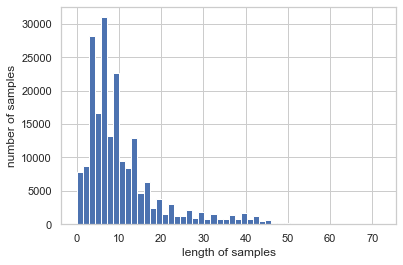

In [61]:
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [62]:
### 토큰화된 데이터 학습
from gensim.models import Word2Vec

In [63]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

* word2vec 임베딩 행렬 확인

In [64]:
model.wv.vector_size

100

In [65]:
model.wv.vectors.shape

(16477, 100)

In [68]:
## 유사단어 추출
print(model.wv.most_similar('최민식'))

[('안성기', 0.8353601694107056), ('한석규', 0.8285879492759705), ('김창완', 0.8205467462539673), ('설경구', 0.8151158690452576), ('이민호', 0.8142589330673218), ('유다인', 0.8119510412216187), ('김갑수', 0.8083759546279907), ('김명민', 0.8068274855613708), ('공리', 0.8047536015510559), ('크리스찬', 0.8006415963172913)]


In [69]:
print(model.wv.most_similar('히어로'))

[('무협', 0.8685317635536194), ('느와르', 0.8564548492431641), ('슬래셔', 0.8523344397544861), ('호러', 0.8501022458076477), ('로코', 0.8095816969871521), ('정통', 0.8042111992835999), ('물의', 0.8039659857749939), ('무비', 0.8012699484825134), ('물', 0.8002834916114807), ('멜로', 0.7921746969223022)]


### 3. 미리 학습한 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 모델 사용

* 자연어 처리 시, Keras의 Embedding()을 사용하여 갖고 있는 학습데이터로부터 처음부터 임베딩 벡터를 훈련시키기도 하지만, 위키피디아 등의 방대한 데이터로 사전에 훈련된 임베딩한 모델을 갖지고 와서 작업할 수 있음
* 예를 들어, 훈련데이터 양이 부족한 경우 다른 방대한 데이터의 임베딩을 가져와서 모델 학습시 사용하면 좋은 성능을 얻을 수 있음


#### 미리 학습한 임베딩(구글이 제공하는 Word2Vec 모델)을 가져와 사용하는 방법

* 모델 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [70]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

('GoogleNews-vectors-negative300.bin.gz',
 <http.client.HTTPMessage at 0x2a71957f8b0>)

In [71]:
## 모델 로드
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [72]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [73]:
## 두 단어간 유사도 계산
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [74]:
# 단어 벡터 출력
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [75]:
word2vec_model['book'].shape

(300,)

### word2vec을 이용한 추천시스템 만들기
참고 : https://brunch.co.kr/@goodvc78/16